In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import requests
import time
import datetime
import math

def get_data(coin, date=None):
    """Helper-function. Gets the data from the cryptocompare api
    Parameters
    ----------
    coin : str
        Symbol of the coin to request (eg BTC for Bitcoin)
    date : str
        start date
    Returns
    -------
    ipdata : dict
        column : value
    """
    if date is None:
        url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym={coin}&tsym=USD&allData=true'
    else:
        today = datetime.datetime.now().date()
        date = datetime.datetime.strptime(date, '%Y-%m-%d').date()
        days = (today - date).days
        if days <= 0:
            days = 1

        url = f"https://min-api.cryptocompare.com/data/histoday?fsym={coin}&tsym=USD&limit={days}"

    
    r = requests.get(url)
    ipdata = r.json()
    return ipdata

def get_trimmed_df(coin, date=None):
    """Gets the data from the get_data function and returns a dataframe
    that contains only the needed columns
    Parameters
    ----------
    coin : str
        Symbol of the coin to request (eg BTC for Bitcoin)
    date : str
        start date
    Returns
    -------
    df : DataFrame
        DataFrame containing the needed columns
    """
    if date is None:
        df = pd.DataFrame(get_data(coin, date)['Data']['Data'])
    else:
        df = pd.DataFrame(get_data(coin, date)['Data'])
    df.time = pd.to_datetime(df.time, unit = 's')
    df.set_index('time', inplace=True)
    df[f'{coin}_value'] = df[['close', 'high', 'low', 'open']].mean(axis = 1)
    df.rename(columns={'volumeto' : f'{coin}_volume'}, inplace=True)
    return df[[f'{coin}_value', f'{coin}_volume']]

In [3]:
coins = ['BTC', 'ETH', 'XRP', 'ADA', 'LTC', 'SOL', 'MATIC']
#coins = ['BTC', 'ETH', 'XRP', 'LTC']

df = pd.DataFrame()
for coin in coins:
    df = pd.concat([df, get_trimmed_df(coin)], axis=1)
df

,BTC_value,BTC_volume,ETH_value,ETH_volume,XRP_value,XRP_volume,ADA_value,ADA_volume,LTC_value,LTC_volume,SOL_value,SOL_volume,MATIC_value,MATIC_volume
time,,,,,,,,,,,,,,
2010-07-17,0.049510,9.902000e-01,0.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.0000,0.00,0.0000,0.000000e+00,0.000000,0.00
2010-07-18,0.070153,5.092000e+00,0.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.0000,0.00,0.0000,0.000000e+00,0.000000,0.00
2010-07-19,0.084235,4.966000e+01,0.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.0000,0.00,0.0000,0.000000e+00,0.000000,0.00
2010-07-20,0.077902,2.059000e+01,0.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.0000,0.00,0.0000,0.000000e+00,0.000000,0.00
2010-07-21,0.074875,4.226000e+01,0.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.0000,0.00,0.0000,0.000000e+00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28,20419.540000,1.597590e+09,1532.0650,1.703277e+09,0.467000,7.939300e+07,0.395600,50104067.25,54.6950,23779690.99,31.3200,2.756495e+08,0.922675,53079587.36
2022-10-29,20762.257500,1.219659e+09,1596.8550,1.488331e+09,0.473725,5.637219e+07,0.416525,63606135.43,55.9675,25491402.74,32.6650,1.215891e+08,0.940975,48629769.60
2022-10-30,20727.665000,7.975877e+08,1607.2100,8.914499e+08,0.463950,4.468385e+07,0.411575,43256516.90,56.0750,22025135.77,32.8275,7.750285e+07,0.922450,84281996.77


In [4]:
df = df[df.index > '2017']
df

,BTC_value,BTC_volume,ETH_value,ETH_volume,XRP_value,XRP_volume,ADA_value,ADA_volume,LTC_value,LTC_volume,SOL_value,SOL_volume,MATIC_value,MATIC_volume
time,,,,,,,,,,,,,,
2017-01-02,1008.5925,6.603807e+07,8.25075,7.152179e+06,0.006321,4.453340e+03,0.000000,0.00,4.50575,1197397.95,0.0000,0.000000e+00,0.000000,0.00
2017-01-03,1023.0875,5.608587e+07,9.01375,5.292232e+06,0.006378,1.258546e+04,0.000000,0.00,4.52525,494437.82,0.0000,0.000000e+00,0.000000,0.00
2017-01-04,1084.8925,1.705846e+08,10.59475,2.269524e+07,0.006509,6.665660e+03,0.000000,0.00,4.50625,1866468.03,0.0000,0.000000e+00,0.000000,0.00
2017-01-05,1037.4800,2.448393e+08,10.16025,2.160218e+07,0.006306,5.972749e+04,0.000000,0.00,4.28975,2312058.24,0.0000,0.000000e+00,0.000000,0.00
2017-01-06,938.8700,1.791607e+08,9.86600,1.926651e+07,0.006248,2.086028e+04,0.000000,0.00,3.95550,1628401.07,0.0000,0.000000e+00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28,20419.5400,1.597590e+09,1532.06500,1.703277e+09,0.467000,7.939300e+07,0.395600,50104067.25,54.69500,23779690.99,31.3200,2.756495e+08,0.922675,53079587.36
2022-10-29,20762.2575,1.219659e+09,1596.85500,1.488331e+09,0.473725,5.637219e+07,0.416525,63606135.43,55.96750,25491402.74,32.6650,1.215891e+08,0.940975,48629769.60
2022-10-30,20727.6650,7.975877e+08,1607.21000,8.914499e+08,0.463950,4.468385e+07,0.411575,43256516.90,56.07500,22025135.77,32.8275,7.750285e+07,0.922450,84281996.77


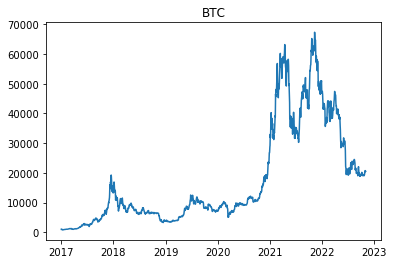

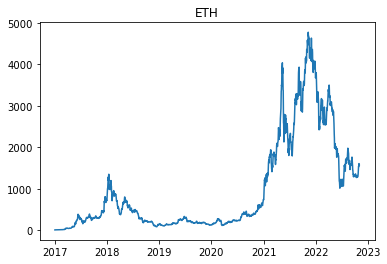

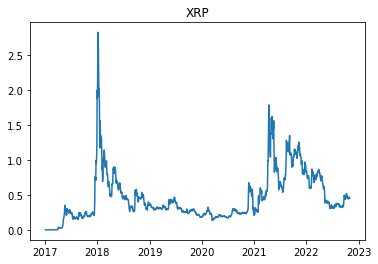

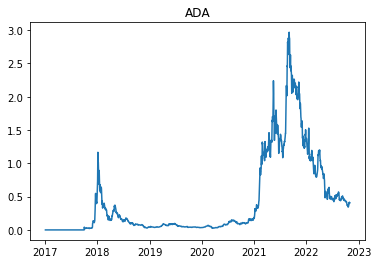

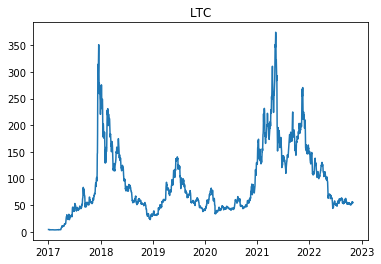

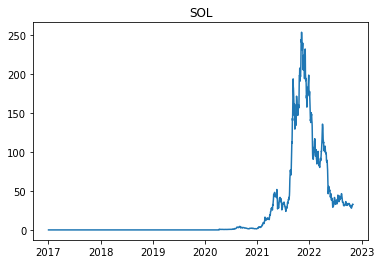

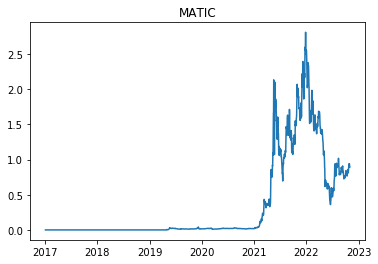

In [5]:
for coin in coins:
    plt.plot(df[f'{coin}_value'])
    plt.title(coin)
    plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler_btc = MinMaxScaler()
scaler_rest = MinMaxScaler()
btc_value = df.values[:, 0].reshape(-1,1)
rest = df.values[:, 1:]
scaled_value = scaler_btc.fit_transform(btc_value)
scaled_rest = scaler_rest.fit_transform(rest)
scaled_value

array([[0.00327283],
       [0.00349068],
       [0.00441955],
       ...,
       [0.29963116],
       [0.29695889],
       [0.29602803]])

In [8]:
scaler_btc = MinMaxScaler()
scaler_rest = MinMaxScaler()
btc_value = df.values[:, 4].reshape(-1,1)
rest = df.values[:, [0, 1, 2, 3] + list(range(5, len(coins)*2))]
scaled_value = scaler_btc.fit_transform(btc_value)
scaled_rest = scaler_rest.fit_transform(rest)
scaled_value

array([[0.00030889],
       [0.00032914],
       [0.00037539],
       ...,
       [0.16218394],
       [0.16057449],
       [0.16098127]])

In [10]:
scaled_ = np.concatenate((scaled_value, scaled_rest), axis=1)
scaled_

array([[3.27283201e-03, 5.02463298e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.49067765e-03, 4.12884569e-03, 1.60116199e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.41954620e-03, 1.44347580e-02, 4.91890393e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.99631158e-01, 7.08706440e-02, 3.35542958e-01, ...,
        1.62894316e-02, 3.28361662e-01, 1.89122396e-02],
       [2.96958885e-01, 1.12546811e-01, 3.31265673e-01, ...,
        6.37730128e-02, 3.23440420e-01, 9.65737455e-03],
       [2.96028026e-01, 6.26950903e-02, 3.29876985e-01, ...,
        1.22922544e-02, 3.18065320e-01, 5.38252712e-03]])

In [11]:
scaled_.shape

(2130, 14)

In [12]:
SEQ_LEN = 8

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_, SEQ_LEN, train_split = 0.90)

In [13]:
# Bitcoin
y_train_rest = y_train[:, 1:]
y_train = y_train[:, 0]

y_test_rest = y_test[:, 1:]
y_test = y_test[:, 0]

In [14]:
[0, 1] + list(range(3, len(coins)*2))

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [78]:
# other
y_train_rest = y_train[:, [0, 1] + list(range(3, len(coins)*2))]
y_train = y_train[:, 1]

y_test_rest = y_test[:, [0, 1] + list(range(3, len(coins)*2))]
y_test = y_test[:, 1]

In [15]:
print(X_train.shape)
print(y_train.shape)
print(y_train_rest.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_rest.shape)

(1909, 7, 14)
(1909,)
(1909, 13)
(213, 7, 14)
(213,)
(213, 13)


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [17]:
model=Sequential()

model.add(LSTM(200, input_shape=(None,len(coins)*2), activation="relu", return_sequences=True))
model.add(Dropout(0.2))
#model.add(keras.layers.BatchNormalization())
model.add(LSTM(250, activation="relu", return_sequences=True))
model.add(Dropout(0.2))
#model.add(keras.layers.BatchNormalization())
model.add(LSTM(100, activation="relu", return_sequences=True))
model.add(Dropout(0.2))
#model.add(keras.layers.BatchNormalization())
model.add(LSTM(20, activation="relu", return_sequences=False))
#model.add(Dropout(0.2))
#model.add(keras.layers.BatchNormalization())

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer=keras.optimizers.Adam(learning_rate=0.000025))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 200)         172000    
                                                                 
 dropout (Dropout)           (None, None, 200)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 250)         451000    
                                                                 
 dropout_1 (Dropout)         (None, None, 250)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 100)         140400    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                9

In [19]:
BATCH_SIZE = 64
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/100
27/27 [==============================] - 3s 27ms/step - loss: 0.0793 - val_loss: 0.5119
Epoch 2/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0770 - val_loss: 0.5007
Epoch 3/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0744 - val_loss: 0.4876
Epoch 4/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0716 - val_loss: 0.4716
Epoch 5/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0681 - val_loss: 0.4521
Epoch 6/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0643 - val_loss: 0.4289
Epoch 7/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0598 - val_loss: 0.4001
Epoch 8/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0548 - val_loss: 0.3651
Epoch 9/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0491 - val_loss: 0.3233
Epoch 10/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0429 - val_loss: 0.2744

27/27 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0129
Epoch 83/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 84/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0125
Epoch 85/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0073
Epoch 86/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0118
Epoch 87/100
27/27 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0081
Epoch 88/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0120
Epoch 89/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0090
Epoch 90/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 0.0124
Epoch 91/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 0.0084
Epo

In [32]:
y_hat = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [34]:
y_test_inverse = scaler_btc.inverse_transform(y_test.reshape(-1,1))
y_hat_inverse = scaler_btc.inverse_transform(y_hat)

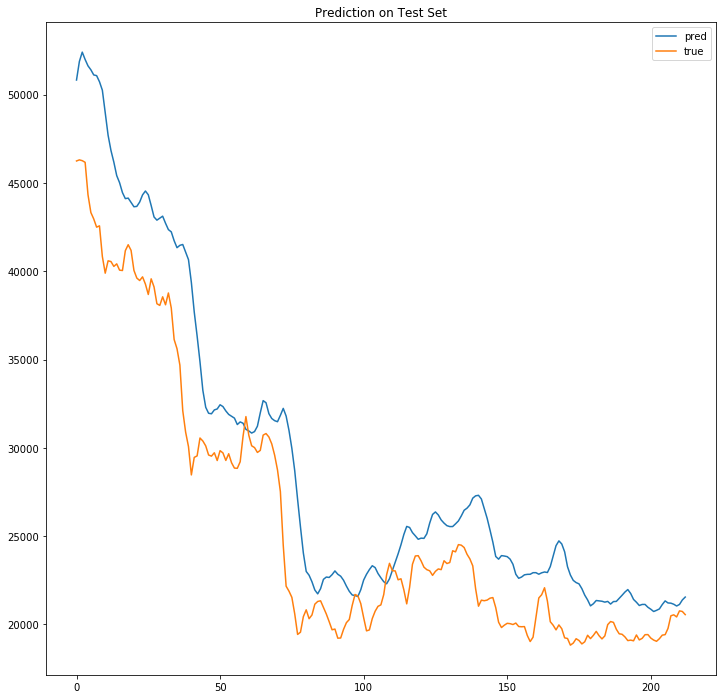

In [35]:
fig = plt.figure(figsize=(12, 12))
plt.plot(y_hat_inverse, label='pred')
plt.plot(y_test_inverse, label='true')
plt.legend()
plt.title('Prediction on Test Set')
plt.show()

60/60 [==============================] - 0s 5ms/step


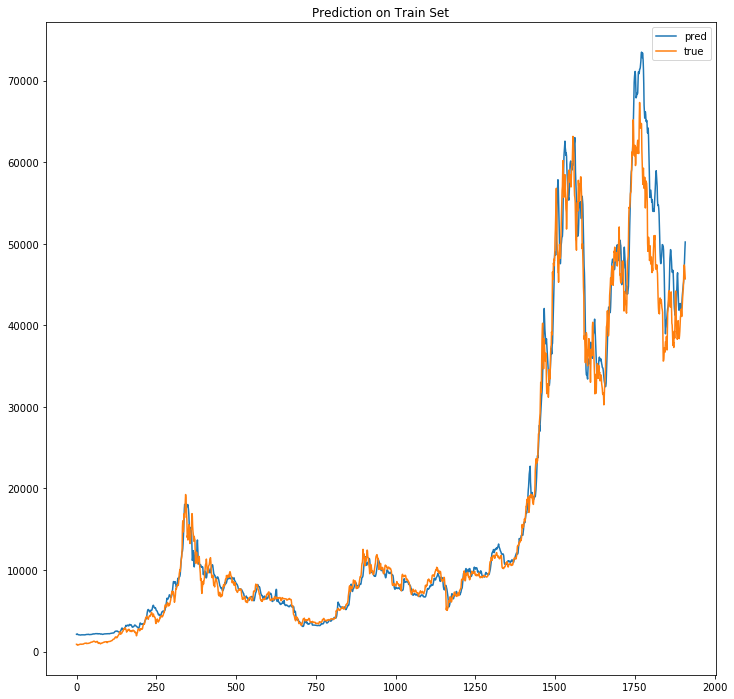

In [38]:
y_hat = model.predict(X_train)
y_train_inverse = scaler_btc.inverse_transform(y_train.reshape(-1,1))
y_hat_inverse = scaler_btc.inverse_transform(y_hat)
fig = plt.figure(figsize=(12, 12))
plt.plot(y_hat_inverse, label='pred')
plt.plot(y_train_inverse, label='true')
plt.title('Prediction on Train Set')
plt.legend()
plt.show()